<b><h2>Eli Newsham - Personal Notebook for Final Project</b></h2>

<b>Datasets used:</b>
<br>https://data.wprdc.org/dataset/allegheny-county-walk-scores
<br>https://data.wprdc.org/dataset/allegheny-county-crash-data




<b>Metrics used:</b> 
- Frequency of pedestrian and user-friendly infrastructure (sidewalks, bike lanes, safety, etc)

<b><h3>Metric: Walkability</b></h3>

For this, I focused on pedestrian friendly infrastructure in terms of areas being more easily walkable. First I went into my dataset .csv file and made edits so that the census tract numbers properly reflected the areas - to do this I used these websites: https://pitt.libguides.com/uscensus/alleghenycotracts, and https://pitt.libguides.com/uscensus/pghcensustracts, to make sure I had accurate information. These were off the 2010 census data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data = pd.read_csv("walkscore.csv", usecols=["Census Tract", "Walk Score"], index_col="Census Tract")
    print(data.head(50))
except UnicodeDecodeError:
    data = pd.read_csv("walkscore.csv", usecols=["Census Tract", "Walk Score"], index_col="Census Tract", encoding='latin1')
    print(data.head(50))
    

                             Walk Score
Census Tract                           
Bluff                              82.0
Golden Triangle/Civic Arena       100.0
Strip District                     83.0
Crawford-Roberts                   77.0
Terrace Village                    71.0
North Oakland                      82.0
Central Oakland                    78.0
Central Oakland                    75.0
South Oakland                      68.0
Middle Hill                        60.0
Upper Hill                         74.0
Bedford Dwellings                  77.0
Terrace Village                    58.0
Terrace Village                    62.0
Lower Lawrenceville                91.0
Polish Hill                        88.0
Shadyside                          91.0
Shadyside                          88.0
Shadyside                          77.0
Shadyside                          88.0
Shadyside                          89.0
Bloomfield                         82.0
Bloomfield                         86.0


In [23]:
summary_data = data.groupby('Census Tract')['Walk Score'].sum().reset_index()

summary_data = data.groupby('Census Tract')['Walk Score'].sum().reset_index()

summary_data_sorted = summary_data.sort_values(by='Walk Score', ascending=False)

# Print the top 5 entries with the highest 'Walk Score'
print("Top 5 Highest Walk Scores:")
print(summary_data_sorted.head(5))

# Print the bottom 5 entries with the lowest 'Walk Score'
print("Bottom 5 Lowest Walk Scores:")
print(summary_data_sorted.tail(5))

Top 5 Highest Walk Scores:
      Census Tract  Walk Score
17      Bloomfield       660.0
153      Shadyside       498.0
191    Wilkinsburg       452.0
114  Mount Lebanon       402.0
108     McKeesport       380.0
Bottom 5 Lowest Walk Scores:
      Census Tract  Walk Score
106       McDonald         3.0
11      Bell Acres         2.0
135  Pine Township         2.0
64        Fawn Twp         0.0
65     Findlay Twp         0.0


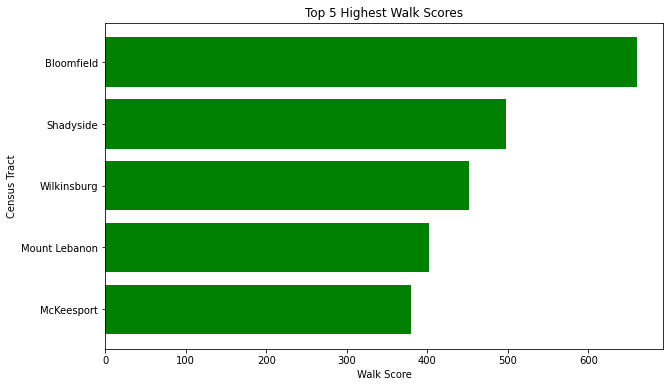

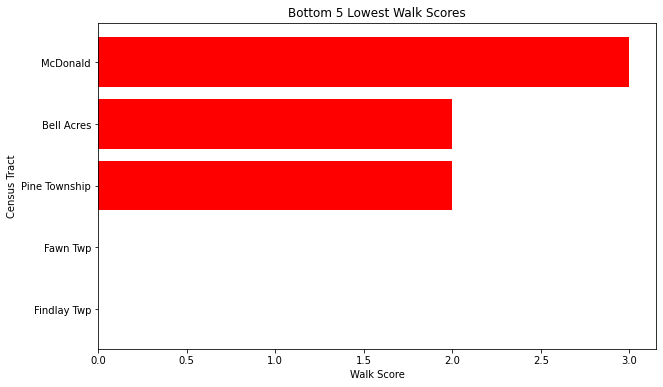

In [24]:
summary_data = data.groupby('Census Tract')['Walk Score'].sum().reset_index()

summary_data_sorted = summary_data.sort_values(by='Walk Score', ascending=False)

top_5 = summary_data_sorted.head(5)
bottom_5 = summary_data_sorted.tail(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5['Census Tract'], top_5['Walk Score'], color='green')
plt.xlabel('Walk Score')
plt.ylabel('Census Tract')
plt.title('Top 5 Highest Walk Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(bottom_5['Census Tract'], bottom_5['Walk Score'], color='red')
plt.xlabel('Walk Score')
plt.ylabel('Census Tract')
plt.title('Bottom 5 Lowest Walk Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest score on top for consistency
plt.show()


From this data, the best areas look like Bloomfield, Shadyside, Wilkinsburg, Mount Lebanon, and McKeesport.

<b><h3>Metric: Crashes</b></h3>

For this, I filtered the data in the given dataset to focus on the ID of Municipality. One of the files in the crashes dataset contains a guide of what codes equal what municipality. I went in with Excel and edited the numbers, replacing them with the related municipality.
<br>
I was interested in the data showing what areas it was more likely to have injuries and/or fatalities from crashes, as this heavily impacts pedestrian safety.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

crash_data = pd.read_csv(
    "crashes.csv",
    usecols=["MUNICIPALITY", "INJURY_COUNT", "FATAL_COUNT", "STREET_NAME"],
    index_col="MUNICIPALITY") 

print(crash_data.head(5))

                         FATAL_COUNT  INJURY_COUNT           STREET_NAME
MUNICIPALITY                                                            
Pleasant Hills Borough             0             0          LEWIS RUN RD
Jefferson Hills Borough            0             1        COAL VALLEY RD
Findlay Township                   0             1  CLINTON FRANKFORT RD
Bellevue Borough                   0             1        NORTH BALPH AV
Churchill Borough                  0             0         THORNBERRY DR


Unique municipalities after cleaning: 128


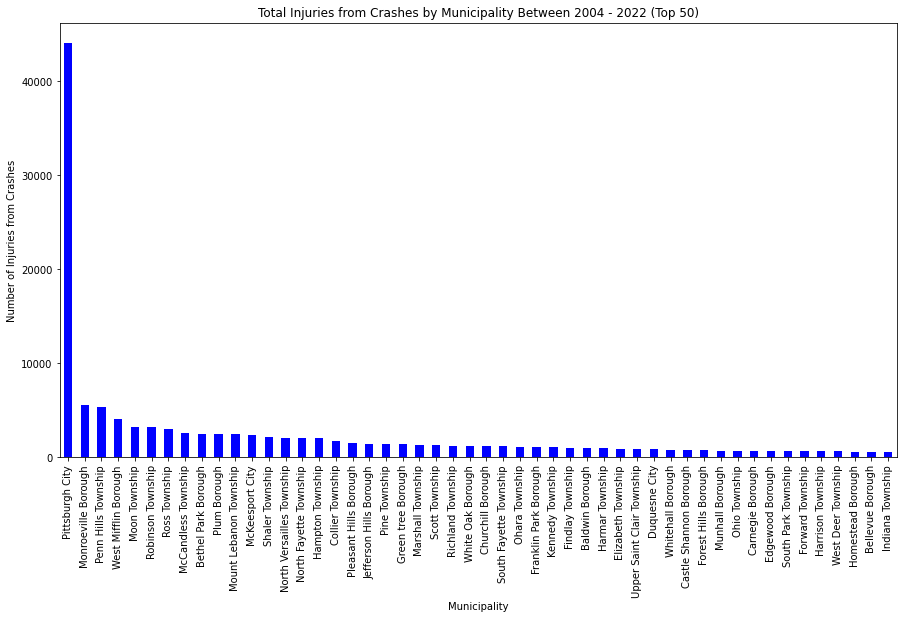

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

crash_data = pd.read_csv("crashes.csv", usecols=["MUNICIPALITY", "INJURY_COUNT"])

print("Unique municipalities after cleaning:", crash_data['MUNICIPALITY'].nunique())

total_injuries = crash_data.groupby('MUNICIPALITY')['INJURY_COUNT'].sum()

top_municipalities = total_injuries.sort_values(ascending=False).head(50)

plt.figure(figsize=(15, 8))
top_municipalities.plot(kind='bar', color='blue')
plt.title('Total Injuries from Crashes by Municipality Between 2004 - 2022 (Top 50)')
plt.ylabel('Number of Injuries from Crashes')
plt.xlabel('Municipality')
plt.show()


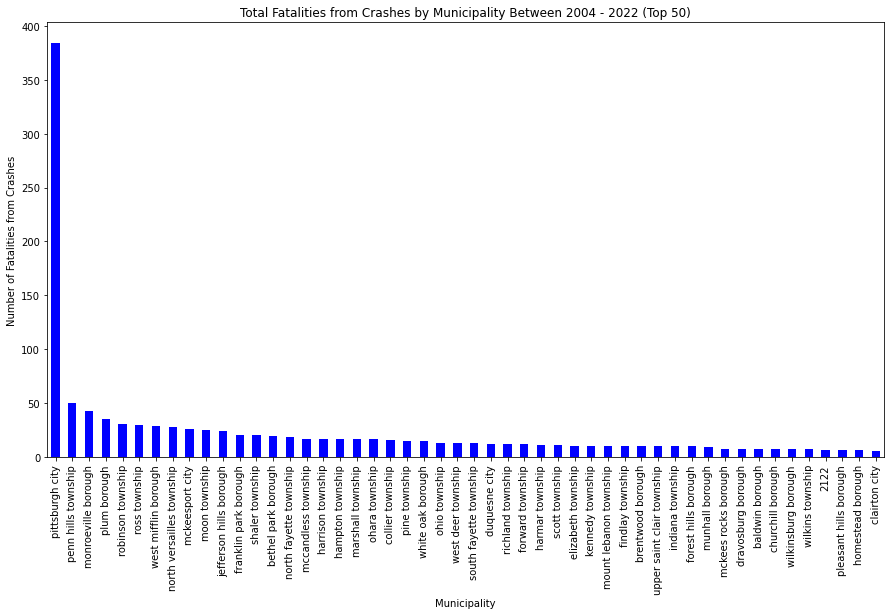

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

crash_data = pd.read_csv("crashes.csv", usecols=["MUNICIPALITY", "FATAL_COUNT"])
total_injuries = crash_data.groupby('MUNICIPALITY')['FATAL_COUNT'].sum()

top_municipalities = total_injuries.sort_values(ascending=False).head(50)

plt.figure(figsize=(15, 8))
top_municipalities.plot(kind='bar', color='blue')
plt.title('Total Fatalities from Crashes by Municipality Between 2004 - 2022 (Top 50)')
plt.ylabel('Number of Fatalities from Crashes')
plt.xlabel('Municipality')
plt.show()


Results from these two graphs indicate that the municipality with the highest number of total injuries from crashes is and the highest number of total fatalities is Pittsburgh City.

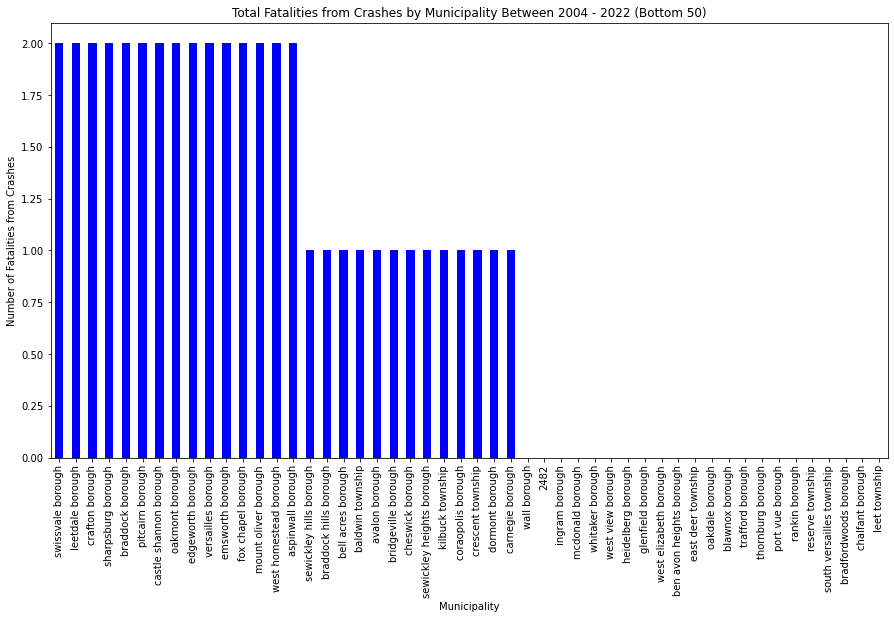

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

crash_data = pd.read_csv("crashes.csv", usecols=["MUNICIPALITY", "FATAL_COUNT"])

total_injuries = crash_data.groupby('MUNICIPALITY')['FATAL_COUNT'].sum()

top_municipalities = total_injuries.sort_values(ascending=False).tail(50)
plt.figure(figsize=(15, 8))
top_municipalities.plot(kind='bar', color='blue')
plt.title('Total Fatalities from Crashes by Municipality Between 2004 - 2022 (Bottom 50)')
plt.ylabel('Number of Fatalities from Crashes')
plt.xlabel('Municipality')
plt.show()


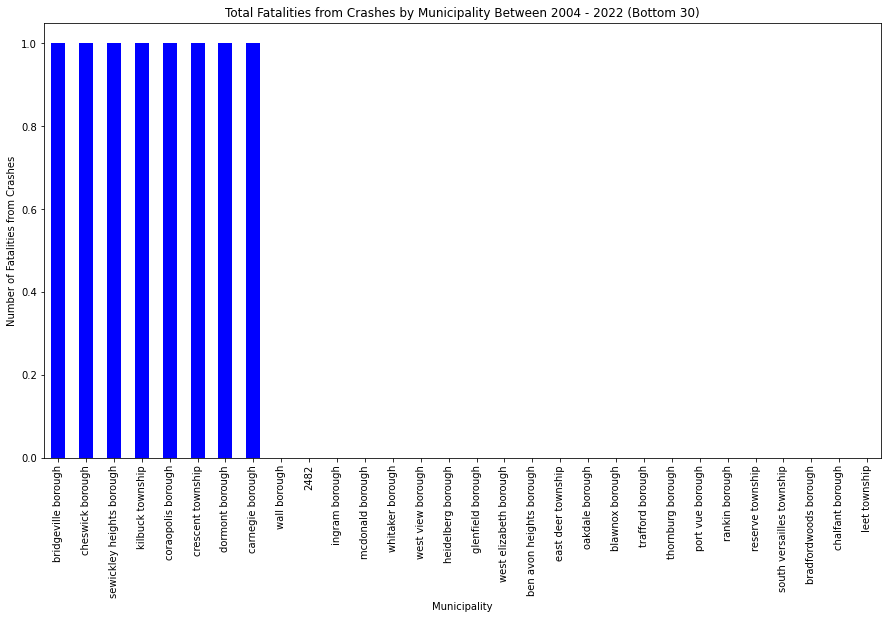

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

crash_data = pd.read_csv("crashes.csv", usecols=["MUNICIPALITY", "FATAL_COUNT"])

total_injuries = crash_data.groupby('MUNICIPALITY')['FATAL_COUNT'].sum()

top_municipalities = total_injuries.sort_values(ascending=False).tail(30)

plt.figure(figsize=(15, 8))
top_municipalities.plot(kind='bar', color='blue')
plt.title('Total Fatalities from Crashes by Municipality Between 2004 - 2022 (Bottom 30)')
plt.ylabel('Number of Fatalities from Crashes')
plt.xlabel('Municipality')
plt.show()


The places with the lowest numbers were Bridgeville, Cheswick, Sewickley Heights, Kilbuck, Corapolis, Crescent, Domant, and Carnegie.

<h3>Conclusion:</h3>

In conclusion, according to the datasets I used, the best neighborhood/area in Pittsurgh is: Either Bloomfield or Shadyside. This is due to it's low place in the list of crashes resulting in injury, and the high walkability scores. The walk score for the walkability dataset takes into account nearby amenities as well, so in these areas you can walk around and access different stores with ease compared to the areas lower on the list.